In [56]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [57]:
model_name = "Qwen/Qwen3-8B" 
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [58]:
dataset = load_dataset("UniqueData/sat-questions-and-answers-for-llm")

In [59]:
print(dataset)
df = dataset['train'].to_pandas()

DatasetDict({
    train: Dataset({
        features: ['id', 'subject', 'prompt', 'A', 'B', 'C', 'D', 'E', 'answer'],
        num_rows: 1380
    })
})


In [60]:
subject_counts = df['subject'].value_counts()
print(subject_counts)

subject
us_history       1108
world_history     272
Name: count, dtype: int64


In [61]:
def calculate_tokens(text):
    return len(tokenizer.encode(text))

In [62]:
# 'prompt' 컬럼이 비어있는 행 제거
df = df.dropna(subset=['prompt'])

# 빈 문자열 제거
df = df[df['prompt'] != ""]

# 토큰
df['token_len'] = df['prompt'].astype(str).apply(lambda x: len(tokenizer.encode(x)))

display(df[['prompt', 'token_len']].head())

,prompt,token_len
0,Sumer and Egypt were similar in all of the following ways EXCEPT,14
1,A follower of the Chinese philosophy of Daoism would MOST agree with which statement?,16
2,Which of these was NOT a characteristic of early humans in the Paleolithic Age?,16
3,Buddhism was founded in part as a response to questions about which faith?,17
4,The Kush city of Meroe rose to prominence mainly because of its natural supply of,17


In [63]:
long_data = df[df['token_len'] > 2048]
len(long_data)

0

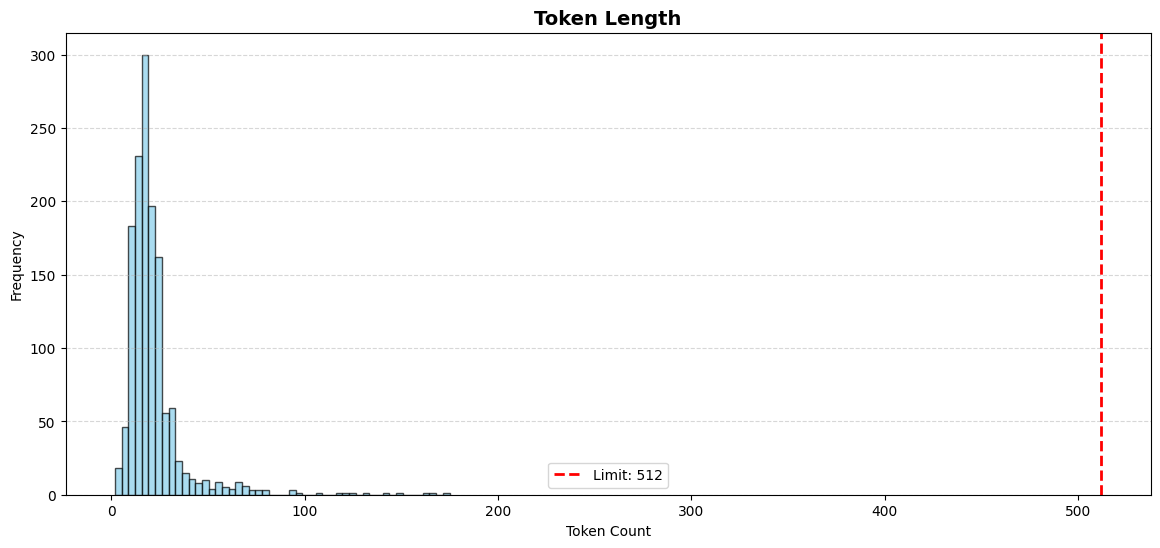

count    1379.000000
mean       21.572879
std        15.738691
min         2.000000
25%        14.000000
50%        18.000000
75%        24.000000
max       175.000000
Name: token_len, dtype: float64


In [64]:
plt.figure(figsize=(14, 6))
plt.hist(df['token_len'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Token Length', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.5) 

plt.axvline(x=512, color='red', linestyle='--', linewidth=2, label='Limit: 512')
plt.legend()

plt.show()

print(df['token_len'].describe())

In [65]:
# 랜덤 다섯개
random = df.sample(n=10)
display(random)

,id,subject,prompt,A,B,C,D,E,answer,token_len
765,516,us_history,The first President of the Independent Republic of Texas was,Sam Houston,Walter Dallas,Stephen F. Austin,Jim Bowie,Dallas Green,A,10
859,610,us_history,All or parts of the following present-day states were part of the Mexican Cession EXCEPT:,California,Nevada,Utah,Colorado,Oklahoma,E,19
1361,1127,us_history,Which did the Beatles influence the LEAST?,Students For a Democratic Society (SDS),American rock and roll,Hippies,Timothy Leary,Yippies,A,9
439,173,us_history,Which factor contributed most to the rise of membership in labor unions between 1915 and 1920?,The efforts of progressive reformers,The expansion of the open shop,The fire at the Triangle Shirtwaist Company,The passage of the Fourteenth Amendment,The exclusion of unskilled workers,A,25
138,145,world_history,Which of these statements MOST accurately describes the Bantu people of sub-Saharan Africa?,They initially organized into a stateless society composed of numerous villages.,They developed a class system that divided people along the lines of social importance.,They relied on a trans-Saharan gold and salt trade for economic and physical survival.,They practiced a monotheistic religion similar to that of the Hebrews.,They experienced violent clashes with the Muslim population in Africa.,A.,16
401,131,us_history,The Fifteenth Amendment tried to ensure the right of black men to vote. The first presidential election after the ratification of the Fifteenth Amendment was in,1864,1920,1860,1960,1872,E,31
1203,968,us_history,"Muhammad Ali was a significant figure in the 1960s, '70s, and '80s for all of the following reasons EXCEPT",he refused to serve in the Vietnam War.,he converted to Islam and adopted a Muslim name.,he campaigned for Ronald Reagan in 1980.,he became a symbol for civil rights.,he won a gold medal at the 1960 Olympics.,C,34
1343,1109,us_history,"For Western Europe, the Marshall Plan provided",military assistance.,cultural links.,technology.,economic aid.,medical goods and equipment.,D,8
790,541,us_history,Some historians date the start of the Civil War to April 1861 when,John Brown led a raid on the federal arsenal at Harpers Ferry,South Carolina seceded from the United States,"Confederate forces fired on Fort Sumter, South Carolina",President Lincoln issued the Emancipation Proclamation,"Union troops laid siege to Richmond, Virginia",C,17
602,346,us_history,What did the Gulf of Tonkin Resolution state?,The United States would take military action in response to a supposed Vietnamese attack on a U.S. destroyer.,Vietnam would be divided politically along the 17th parallel.,The United States would play an active role in an attempt to overthrow the government of Ngo Dinh Diem.,The Selective Service would begin drafting men in the United States to fight in Vietnam.,The U.S. Army would launch a bombing cam paign against military targets in North Vietnam.,A,10


In [66]:
# 가장 토큰 긴
longest = df.nlargest(1, 'token_len')
display(longest)
longest.info()

,id,subject,prompt,A,B,C,D,E,answer,token_len
977,731,us_history,"I. ""The Kansas-Nebraska Act authorizes the further extension of slavery and we have, do now, and will continue to protest most emphatically against … slavery."" (1854) II. ""The territories were the common property of the several states. As a joint agent of the states, Congress has no power to deny the citizens of any state the right to take their property into a territory… Therefore slavery is legal in the territories. If Wilmot carries, woe, woe I say to the union."" (1850) III. ""We beg the slave owners to pause before they proceed further to disturb the peace we had hoped the Compromise of 1850 would have made perpetual."" (1854) Which of the above statement(s) would John C. Calhoun have supported?",I,II,III,I and III,II and III,B,175


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 977 to 977
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1 non-null      int64 
 1   subject    1 non-null      object
 2   prompt     1 non-null      object
 3   A          1 non-null      object
 4   B          1 non-null      object
 5   C          1 non-null      object
 6   D          1 non-null      object
 7   E          1 non-null      object
 8   answer     1 non-null      object
 9   token_len  1 non-null      int64 
dtypes: int64(2), object(8)
memory usage: 88.0+ bytes


In [67]:
# 가장 긴 문제 (prompt) -> 한국어 번역 -> 토큰 길이 확인
prompt_text = """I. "캔자스-네브래스카 법은 노예제의 추가 확대를 승인하고 있으며, 우리는 노예제에 대해 과거에도 그랬고 현재도 그러하며, 앞으로도 가장 강력하게 반대할 것이다." (1854년)II. "준주(Territories)는 여러 주(States)의 공동 자산이다. 주들의 공동 대리인으로서, 의회는 그 어떤 주의 시민에게도 자신의 재산을 준주로 가져갈 권리를 거부할 권한이 없다... 따라서 노예제는 준주에서 합법이다. 만약 윌모트 조항이 통과된다면, 연방(Union)에 재앙이, 재앙이 닥칠 것이라고 나는 말한다." (1850년)
III. "우리는 1850년 타협으로 영구적으로 정착되기를 희망했던 그 평화를 노예 소유주들이 더 이상 깨뜨리기 전에 멈춰줄 것을 간청한다." (1854년)
존 C. 칼훈(John C. Calhoun)이라면 위 진술 중 어느 것을 지지했겠는가?"""
token_len = len(tokenizer.encode(prompt_text))
print(f"Token Length: {token_len}")

Token Length: 271


In [68]:
df['A_len'] = df['A'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['B_len'] = df['B'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['C_len'] = df['C'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['D_len'] = df['D'].astype(str).apply(lambda x: len(tokenizer.encode(x)))
df['E_len'] = df['E'].astype(str).apply(lambda x: len(tokenizer.encode(x)))

In [69]:
print("A max:", df['A_len'].max())
print("B max:", df['B_len'].max())
print("C max:", df['C_len'].max())
print("D max:", df['D_len'].max())
print("E max:", df['E_len'].max())

A max: 38
B max: 36
C max: 35
D max: 39
E max: 37


In [70]:
# train data token 최대 길이 보기
dataset = pd.read_csv('../../data/train.csv') 

# Flatten the JSON dataset
records = []
for _, row in dataset.iterrows():
    problems = literal_eval(row['problems'])
    record = {
        'id': row['id'],
        'paragraph': row['paragraph'],
        'question': problems['question'],
        'choices': problems['choices'],
        'answer': problems.get('answer', None),
        "question_plus": problems.get('question_plus', None),
    }
    # Include 'question_plus' if it exists
    if 'question_plus' in problems:
        record['question_plus'] = problems['question_plus']
    records.append(record)
        
# Convert to DataFrame
df = pd.DataFrame(records)

In [71]:
df['paragraph_token_len'] = df['paragraph'].apply(calculate_tokens)

In [72]:
print(f"최대 토큰 길이: {df['paragraph_token_len'].max()}")

최대 토큰 길이: 1508
